# COMP5318 - Machine Learning and Data Mining: Assignment 1
**Deadline**: The last day of Week 4, at 11:59PM

Full Name: Jingyun He

Student ID: 530416562

# 1. Summary
The goal of this assignment is to build a classifier to classify some grayscale images of the size 28x28 into a set of categories. The dimension of the original data is large, so you need to be smart on which method you gonna use and perhaps perform a pre-processing step to reduce the amount of computation. Part of your marks will be a function of the performance of your classifier on the test set.

# 2. Dataset description
The dataset consists of a training set of 30,000 examples and a test set of 5,000 examples. They belong to 10 different categories. The validation set is not provided, but you can randomly pick a subset of the training set for validation. The features of the 5,000 test examples are given, you will analyse the performance of your proposed method by uploading the predicted labels of test examples. Please note that we provide only PART of the original Fashion-MNIST, you must use the GIVEN `train.csv` (not the original dataset from the official website) for training; or it will be considered as cheating. <br />
Here are examples illustrating samples of the dataset (each class takes one row):

<img src="Dataset_image.jpg" alt="DataSet" title="DataSet" width="450" height="300" />

There are 10 classes in total:

    - 0 T-shirt/Top
    - 1 Trouser
    - 2 Pullover
    - 3 Dress
    - 4 Coat
    - 5 Sandal
    - 6 Shirt
    - 7 Sneaker
    - 8 Bag
    - 9 Ankle boot

# 3. How to load the data and make output prediciton
There is a Input folder including only 2 files (which can be downloaded from Canvas):

    1. train.csv (30000 image samples for training including features and label) 
    2. test_input.csv (5000 images for prediction)

## 3.1 How to load the data

To read the *csv* file and load the data into a dataframe using pandas. 

The **training data files are in the ./Input/train** and **testing data file are in ./Input/test**. <br /> Use the following code:

In [21]:
import pandas as pd
import os
print(os.listdir("./Input/train"))
pd.set_option('display.max_columns', 10)

['train.csv']


In [22]:
# train.csv including feature and label using for training model.
data_train_df = pd.read_csv('./Input/train/train.csv') 

In [23]:
data_train_df.head()

,id,v1,v2,v3,v4,...,v781,v782,v783,v784,label
0,0,0,0,0,0,...,0,0,0,0,2
1,1,0,0,0,0,...,0,0,0,0,1
2,2,0,0,0,0,...,0,0,0,0,1
3,3,0,0,0,1,...,0,0,0,0,4
4,4,0,0,0,0,...,0,0,0,0,8


Then data would be a dataframe with 30000 samples including 784 features (from v1 to v784) and its label.

In [24]:
# Selecting input feature
data_train_feature = data_train_df.loc[:, "v1":"v784"].to_numpy()

# Selecting output lable 
data_train_label = data_train_df.label.to_numpy()

Showing a sample data. The first example belongs to class 2: Pullover

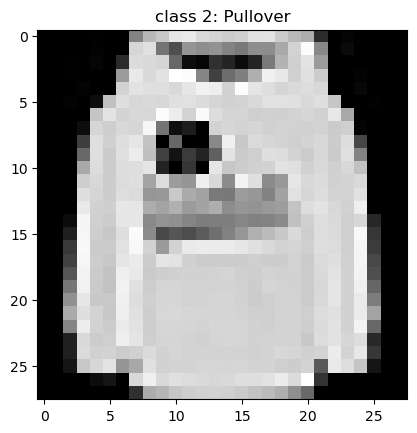

In [25]:
import matplotlib.pyplot as plt
data_train_feature = data_train_feature.reshape((data_train_feature.shape[0], 28, 28))
plt.imshow(data_train_feature[0], cmap=plt.get_cmap('gray'))
plt.title("class " + str(data_train_label[0]) + ": Pullover" )
plt.show()

## 3.2 How to loading test data and output the prediction

In [26]:
# test_input.csv includes 5000 samples used for label prediction. Test samples do not have labels.
data_test_df = pd.read_csv('./Input/test/test_input.csv', index_col=0) 

In [27]:
data_test_df.head()

,v1,v2,v3,v4,v5,...,v780,v781,v782,v783,v784
id,,,,,,,,,,,
0,0,0,0,0,0,...,0,0,0,0,0
1,0,0,0,0,0,...,0,0,0,0,0
2,0,0,0,0,0,...,0,0,0,0,0
3,0,0,0,0,0,...,0,0,0,0,0
4,0,0,0,0,0,...,0,0,0,0,0


After making a prediction on test data, all predicted lables will be saved in “test_output.csv”. You may use the following code to generate an output file that meets the requirement. 

In [129]:
# assume output is the predicted labels from classifiers using input as data from test_input.csv
# (5000,)
from sklearn.ensemble import RandomForestClassifier

# Get features in the test data
data_test_feature = data_test_df.loc[:, "v1":"v784"].to_numpy()
data_test_feature = data_test_feature.reshape((data_test_feature.shape[0], 28, 28))

# Reshape the data from 3-dimension to 2-dimension
data_train_feature_2D = (data_train_feature.reshape(data_train_feature.shape[0], data_train_feature.shape[1] * data_train_feature.shape[2]))
data_test_feature_2D = (data_test_feature.reshape(data_test_feature.shape[0], data_test_feature.shape[1] * data_test_feature.shape[2]))

# Classifier is Random Forest, which is tested to be the best one 
rf_final = RandomForestClassifier(n_estimators=200)
rf_final.fit(data_train_feature_2D, data_train_label)

# print(data_train_feature_2D)
# print(data_test_feature_2D)
output = rf_final.predict(data_test_feature_2D)

print(output)

output_df = pd.DataFrame(output, columns = ['label'])
output_df.to_csv('./Output/test_output.csv', sep=",", float_format='%d', index_label="id")

[1 1 1 ... 5 0 2]


We will load the output file using the code for loading data above. It is your responsibility to make sure the output file can be correctly loaded using this code.
The performance of your classifier will be evaluated in terms of the top-1 accuracy metric, i.e.<br /><br />
 $$\text{Accuracy} = \frac{\text{Number of correct classifications}}{\text{Total number of test examples used}} * 100\%$$

# 4. Task description

Your task is to determine / build a classifier for the given data set to classify images into categories and write a report. The score allocation is as follows:

    1. Code: max 65 points
    2. Report: max 35 points
    

## 4.1 Code
### The code must clearly show :
    1. Pre-process data
    2. Details of your implementation for each algorithm
    3. Fine-tune hyper-parameters for each algorithm and running time
    4. The comparison result between 4 different algorithms including 3 single methods and one ensemble method
    5. Hardware and software specifications of the computer that you used for performance evaluation

### 4.1.1 Data pre-processing

You will need to have at least one pre-process techique before you can apply the classification algorithms. Pre-process techique can be **Normalisation**, **PCA**, etc.

In [29]:
# Define X_train, y_train
X = data_train_df.loc[:, "v1":"v784"]
# X_test = data_test_df.loc[:, "v1":"v784"]

y = data_train_df.label

In [30]:
# Library
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt

# Split training set into 3 pieces for training, validating and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)

In [31]:
# Normalisation
from sklearn.preprocessing import MinMaxScaler

# Create an object
scaler = MinMaxScaler()

# Calculate min and max value of the training data
scaler.fit(X_train)

# Apply normalisation to the training set and test set
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

### 4.1.2 Classification algorithms 

You will now apply multiple classifiers to the pre-processed dataset. You have to implement at least 3 classifiers in particular:

    1. Nearest Neighbor
    2. Logistic Regression
    3. Naïve Bayes 
    4. Decision Tree
    5. SVM

and one ensemble method:
    
    1. Bagging
    2. Boosting
    3. Random forest
    
For binary classifiers, we can use those classifiers for the data which has more than 2 labels using the one-vs-rest method. The implementation can use sklearn, or can be implemented from scratch.

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

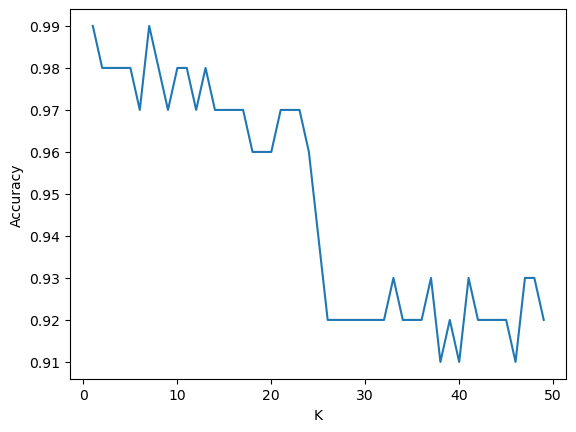

In [60]:
# K-nearest Neighbor

# from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
# import matplotlib.pyplot as plt
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)
k_range = range(1, 50)
cv_scores = []

for n in k_range:
    knn = KNeighborsClassifier(n)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

plt.plot(k_range, cv_scores)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [41]:
# # Parameter Tuning for K-nearest Neighbour
# Accroding to the best k=8 above, normalize the attribute values and calculate the accuracy

# Library for calculating the accuracy
from sklearn.metrics import accuracy_score

best_knn = KNeighborsClassifier(n_neighbors=8)
best_knn.fit(X_train_norm, y_train)
y_pred = best_knn.predict(X_test_norm)
print("Accuracy about KNN: {:.2f}".format(accuracy_score(y_pred, y_test)))

Accuracy about KNN: 0.84


D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


The time complexity of KNN is O(nd)  

In [63]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train_norm, y_train)
y_pred_lr = logreg.predict(X_test_norm)

lr_score = cross_val_score(logreg, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy about Logistic Regression on training set: {:.2f}".format(lr_score.mean()))
print("Accuracy about Logistic Regression on test set: {:.2f}".format(accuracy_score(y_pred_lr, y_test)))

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

Accuracy about Logistic Regression on training set: 0.84
Accuracy about Logistic Regression on test set: 0.85


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The time complexity of Logistic Regression is O(d)

<BarContainer object of 15 artists>

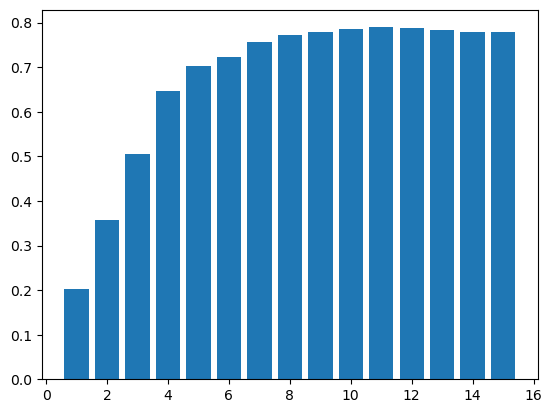

In [72]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

depth_score = []
depth_range = range(1, 16)

for n in depth_range:
    clf_dt = DecisionTreeClassifier(max_depth = n)
    clf_dt.fit(X_train, y_train)
    temp_score_2 = cross_val_score(clf_dt, X_train, y_train, cv=10, scoring='accuracy')
    depth_score.append(temp_score_2.mean())


plt.bar(range(1,16), depth_score) # x-axis is max_depth, y-axis is accuracy

In [80]:
# Parameter Tuning for Decision Tree
# Accroding to the best depth is 11 above, normalize the attribute values and calculate the accuracy

best_dt = DecisionTreeClassifier(criterion='entropy', max_depth=11, random_state=42)
best_dt.fit(X_train_norm, y_train)

print("Accuracy about Decision Tree on training set: {:.2f}".format(best_dt.score(X_train_norm, y_train)))
print("Accuracy about Decision Tree on test set: {:.2f}".format(best_dt.score(X_test_norm, y_test)))

Accuracy about Decision Tree on training set: 0.89
Accuracy about Decision Tree on test set: 0.79


The running time of Decision Tree is O(m*n)

n_estimators: [0.8641997768098394, 0.8632498093067144, 0.8655998793219656, 0.8630998543082148, 0.8640497993102145, 0.864349709307214, 0.8639998318115897]


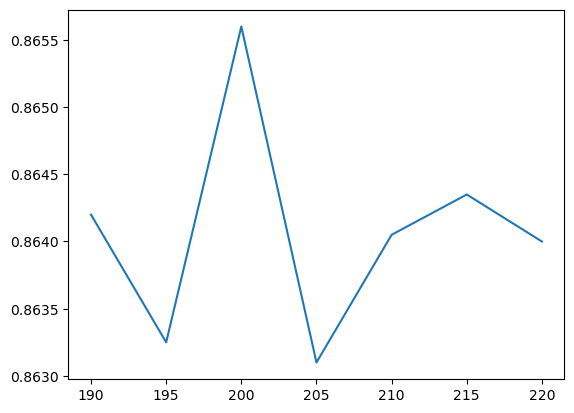

In [111]:
# Random Forest

# To look for the best n_estimators
from sklearn.ensemble import RandomForestClassifier

ne_score = []

for i in range(190, 221, 5):
    rfc = RandomForestClassifier(n_estimators=i)
    score = cross_val_score(rfc, X_train, y_train, cv=3, scoring='accuracy')
    ne_score.append(score.mean())

# score_max = max(ne_score)
print('n_estimators: {}'.format(ne_score))

plt.plot(range(190, 221, 5), ne_score) # x-axis is max_depth, y-axis is accuracy

In [113]:
# Parameter Tuning for Random Forest
# Accroding to the best n_estimators is 200 above, normalize the attribute values and calculate the accuracy

best_rf = RandomForestClassifier(n_estimators=200)
best_rf.fit(X_train_norm, y_train)

print("Accuracy about Random Forest on training set: {:.2f}".format(best_rf.score(X_train_norm, y_train)))
print("Accuracy about Random Forest on test set: {:.2f}".format(best_rf.score(X_test_norm, y_test)))

Accuracy about Random Forest on training set: 1.00
Accuracy about Random Forest on test set: 0.88


The time complexity of Random Forest is O(d * n * log(n))

### 4.1.3 Parameter Tuning

For each classifiers we would like to find the best parameters using grid search with k-fold (k>=5) cross validation.

### 4.1.4 Classifier comparisons

After finding the best parameter for each algorithm, we would like to make comparisons between all classifiers using their own best hyper-parameters.

In conclusion:

the accuracy about K-nearest Neighbour is 0.84;
the accuracy about Logistic Regression is 0.85;
the accuracy about Decision Tree is 0.79;
the accuracy about Random Forest is 0.88

The best classifier is Random Forest with n_estimators is 200.

## 4.2 Report

### The report must clearly show:
    1. Details of your classifiers using for assignment 1
    2. The predicted results from your classifier on test examples
    3. Results comparison and discussion
    4. Following the format in rubric : Introduction -> Methods -> Experiments result and discussion -> Conclusion
    5. The maximum length of the report is 10 (excluding appendix and references)
    6. Clearly provide instructions on how to run your code, hardware and software environments in the Appendix section of your report
    7. Detail of student including ID, name
    8. Please also refer rubric on Canvas for more detail